<a href="https://colab.research.google.com/github/Michelleagl/Series_de_Tiempo/blob/main/transformaciones_ajustes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import scipy as sp

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU



In [ ]:
stock = 'META'
ticker = yf.Ticker(stock)
hist2 = ticker.history(start= '2013-01-01', end= '2023-12-31', interval='1mo')['Close']

hist2

,Close
Date,
2013-01-01 00:00:00-05:00,30.887003
2013-02-01 00:00:00-05:00,27.168201
2013-03-01 00:00:00-05:00,25.503212
2013-04-01 00:00:00-04:00,27.686640
2013-05-01 00:00:00-04:00,24.276905
...,...
2023-08-01 00:00:00-04:00,295.001801
2023-09-01 00:00:00-04:00,299.308807
2023-10-01 00:00:00-04:00,300.365601


In [ ]:
# prompt: change index from format 'yyyy-mm-dd 00:00:00-00:00' to 'yyyy-mm-dd'

hist2.index = hist2.index.strftime('%Y-%m-%d')

In [ ]:
hist2.index = pd.to_datetime(hist2.index)
hist2.index


DatetimeIndex(['2013-01-01', '2013-02-01', '2013-03-01', '2013-04-01',
               '2013-05-01', '2013-06-01', '2013-07-01', '2013-08-01',
               '2013-09-01', '2013-10-01',
               ...
               '2023-03-01', '2023-04-01', '2023-05-01', '2023-06-01',
               '2023-07-01', '2023-08-01', '2023-09-01', '2023-10-01',
               '2023-11-01', '2023-12-01'],
              dtype='datetime64[ns]', name='Date', length=132, freq=None)

In [ ]:
hist2

,Close
Date,
2013-01-01,30.887003
2013-02-01,27.168201
2013-03-01,25.503212
2013-04-01,27.686640
2013-05-01,24.276905
...,...
2023-08-01,295.001801
2023-09-01,299.308807
2023-10-01,300.365601


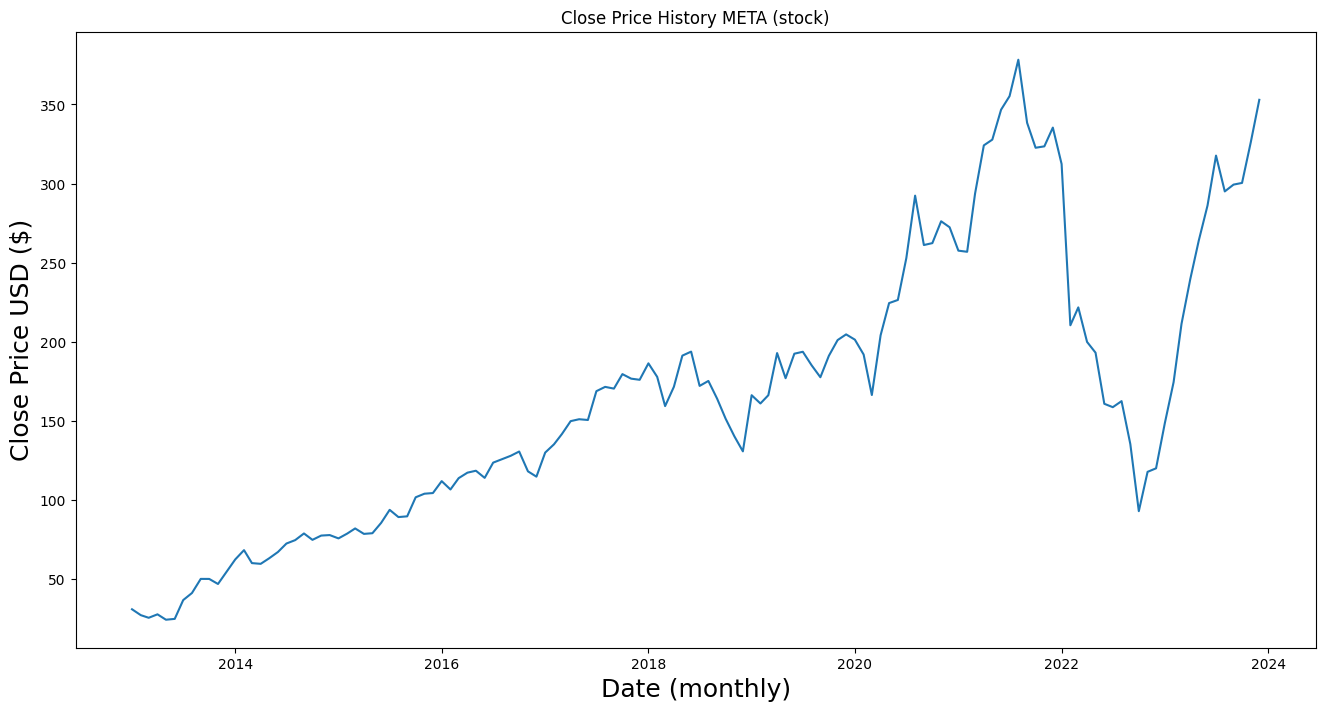

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Close Price History META (stock)')
plt.plot(hist2)
plt.xlabel('Date (monthly)', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
hist2.var()

7767.581725198205

In [ ]:
hist2.std()

88.13388522695573

In [ ]:
hist2.skew()

0.48226391650038125

In [ ]:
sp.stats.skew(hist2, bias=False), sp.stats.skew(hist2)


(0.4822639165003813, 0.47676625358591945)

<Axes: >

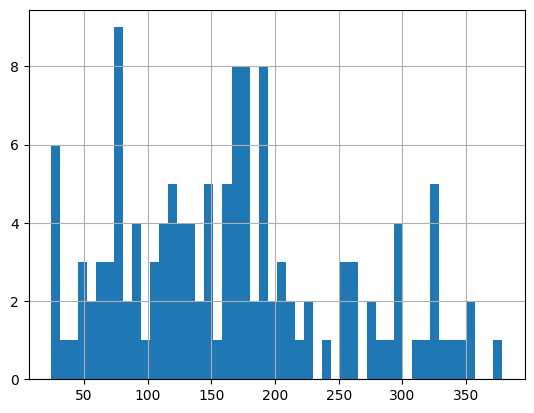

In [ ]:
hist2.hist(bins=50)

<Axes: xlabel='Date'>

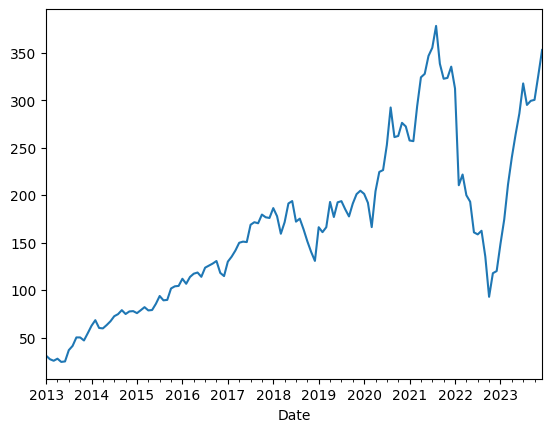

In [ ]:
hist2.plot()

### Elimina valores antiguos que no representan la actualidad


In [ ]:
hist2["2017-01-01":].skew()

0.6440133359049421

In [ ]:
hist2["2017-01-01":].std()

69.0338343428271

<Axes: xlabel='Date'>

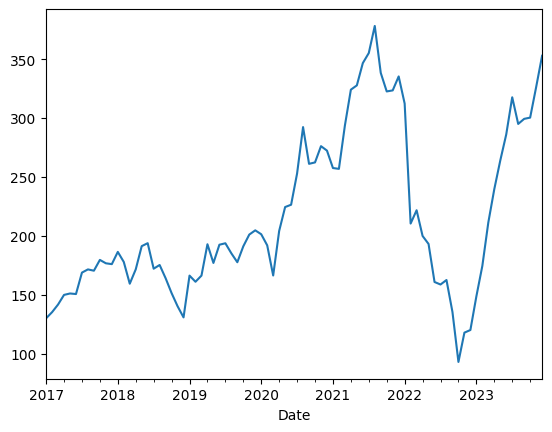

In [ ]:
hist2["2017-01-01":].plot()

<Axes: >

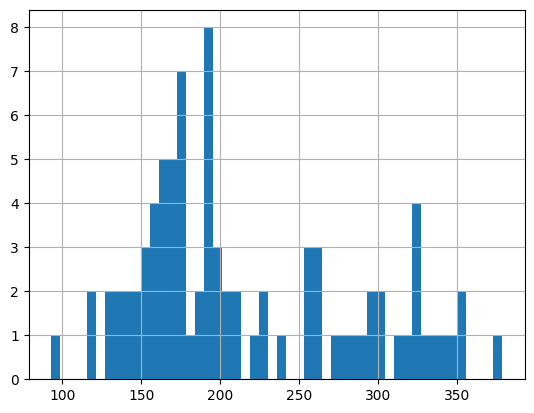

In [ ]:
hist2["2017-01-01":].hist(bins=50)


### Diferenciación
 Calculamos la diferencia de un elemento en nuestro DataFrame comparado a otro elemento.

In [ ]:
hist2.diff()

,Close
Date,
2013-01-01,NaN
2013-02-01,-3.718801
2013-03-01,-1.664989
2013-04-01,2.183428
2013-05-01,-3.409735
...,...
2023-08-01,-22.641815
2023-09-01,4.307007
2023-10-01,1.056793


In [ ]:
hist2.diff().skew()

-1.5323493551689769

<Axes: xlabel='Date'>

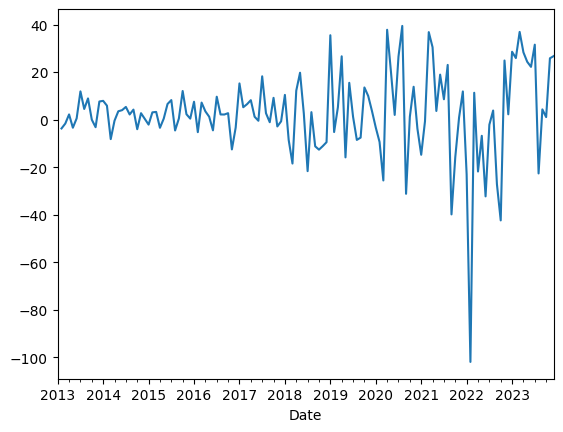

In [ ]:
hist2.diff().plot()

<Axes: >

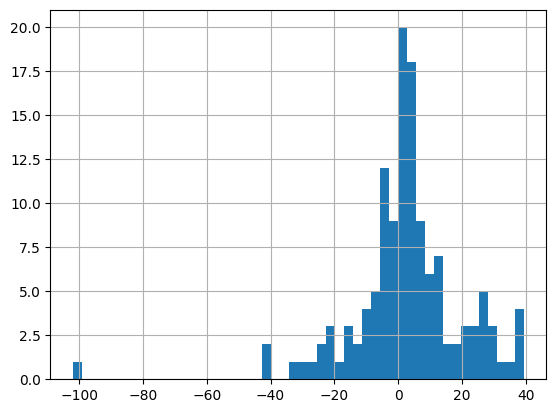

In [ ]:
hist2.diff().hist(bins=50)

###  Retornos (CAMBIO PORCENTUAL)

Devuelve un DataFrame con la diferencia porcentual entre los valores de cada fila y, de forma predeterminada, la fila anterior.

Se puede especificar con qué fila se realizará la comparación mediante el parámetro de periodos.

In [ ]:
hist2.pct_change()

,Close
Date,
2013-01-01,NaN
2013-02-01,-0.120400
2013-03-01,-0.061284
2013-04-01,0.085614
2013-05-01,-0.123155
...,...
2023-08-01,-0.071281
2023-09-01,0.014600
2023-10-01,0.003531


In [ ]:
hist2.pct_change().skew()


0.3399031597057147

<Axes: xlabel='Date'>

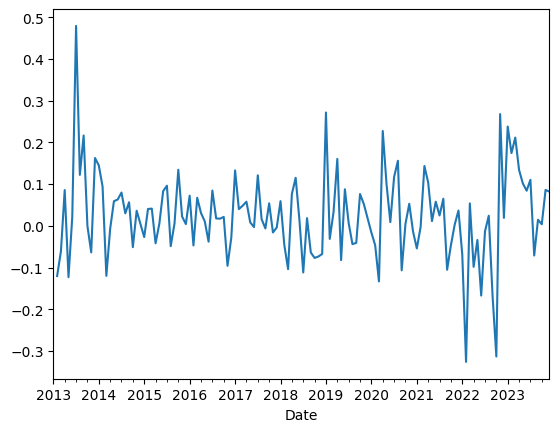

In [ ]:
hist2.pct_change().plot()


Valores y comportamientos atípicos más notorios e identificables, se estandariza a partir de lo que es el retorno (muy parecido a lo que conocemos como error).

<Axes: >

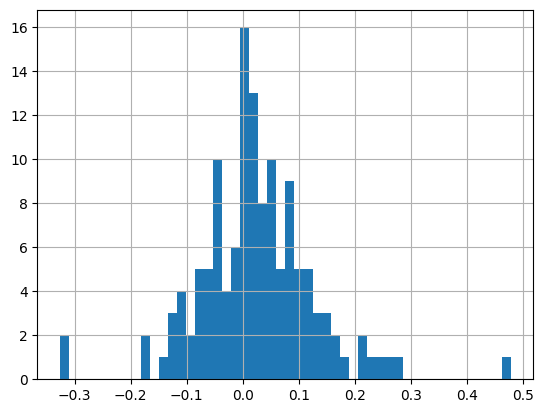

In [ ]:
hist2.pct_change().hist(bins=50)

## Escalar con min y MAX


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
miMA = MinMaxScaler()
hist2_scaled = miMA.fit_transform(hist2.values.reshape(-1,1))

In [ ]:
# sesgo con el nuevo valor

sp.stats.skew(hist2_scaled, bias=False)

array([0.48226392])

In [ ]:
# desviación estándar

hist2_scaled.std()

0.24804596447843832

In [ ]:
# promedio

hist2_scaled.mean()

0.39958507569180873

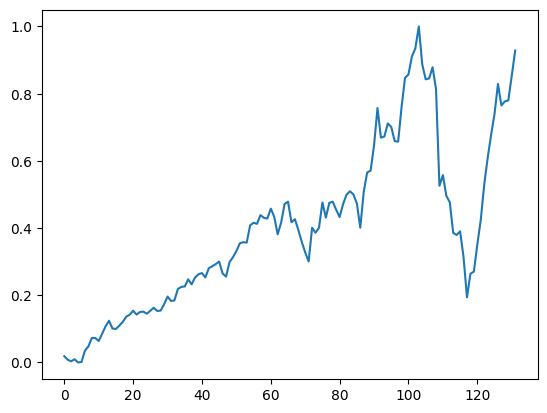

In [ ]:
plt.plot(hist2_scaled)

(array([6., 1., 1., 3., 2., 3., 3., 9., 2., 4., 1., 3., 4., 5., 4., 4., 2.,
        5., 1., 5., 8., 8., 2., 8., 2., 3., 2., 1., 2., 0., 1., 0., 3., 3.,
        0., 2., 1., 1., 4., 0., 1., 1., 5., 1., 1., 1., 2., 0., 0., 1.]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ]),
 <BarContainer object of 50 artists>)

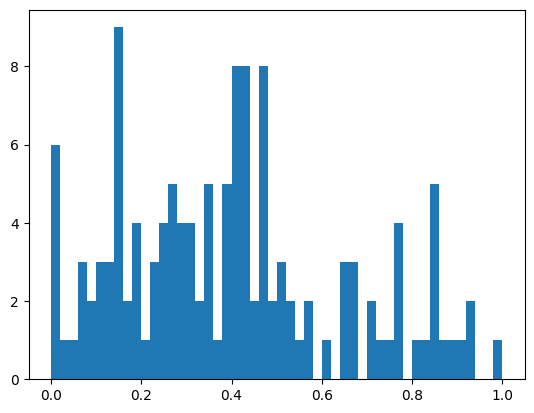

In [ ]:
plt.hist(hist2_scaled, bins=50)


Vemos el escalamiento de valores e identificamos claramennte el máximo y nos damos idea de los mínimos. Los valores entre 0-1 y como se demuestra la corelación entre ambos arrays

## Desplazar los datos


In [ ]:
Z = hist2_scaled + 1 # si quieres desplazar, en éste caso mayor a 1


In [ ]:
sp.stats.skew(Z, bias=False)

array([0.48226392])

In [ ]:
Z.std()

0.24804596447843832

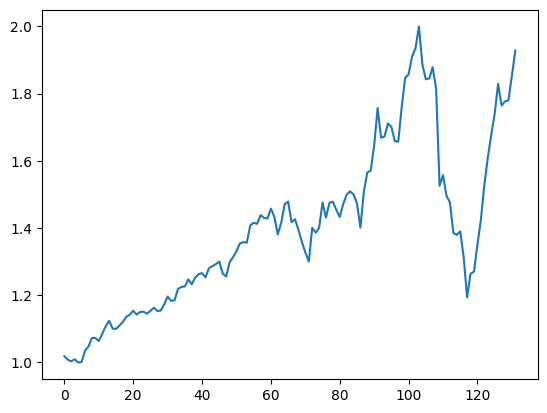

In [ ]:
plt.plot(Z)

(array([6., 1., 1., 3., 2., 3., 3., 9., 2., 4., 1., 3., 4., 5., 4., 4., 2.,
        5., 1., 5., 8., 8., 2., 8., 2., 3., 2., 1., 2., 0., 1., 0., 3., 3.,
        0., 2., 1., 1., 4., 0., 1., 1., 5., 1., 1., 1., 2., 0., 0., 1.]),
 array([1.  , 1.02, 1.04, 1.06, 1.08, 1.1 , 1.12, 1.14, 1.16, 1.18, 1.2 ,
        1.22, 1.24, 1.26, 1.28, 1.3 , 1.32, 1.34, 1.36, 1.38, 1.4 , 1.42,
        1.44, 1.46, 1.48, 1.5 , 1.52, 1.54, 1.56, 1.58, 1.6 , 1.62, 1.64,
        1.66, 1.68, 1.7 , 1.72, 1.74, 1.76, 1.78, 1.8 , 1.82, 1.84, 1.86,
        1.88, 1.9 , 1.92, 1.94, 1.96, 1.98, 2.  ]),
 <BarContainer object of 50 artists>)

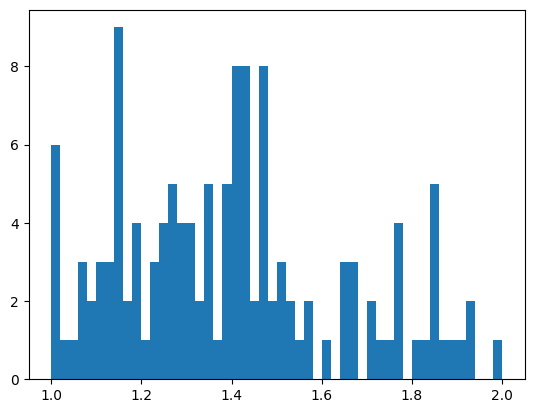

In [ ]:
plt.hist(Z, bins=50)

Al desplazar los datos notamos como cambian los valores de la media, de distribuciones. Se mueven para después intentar ajustarlos.

## Estandarización


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
est = StandardScaler()
hist2_est = est.fit_transform(hist2.values.reshape(-1,1))


In [ ]:
sp.stats.skew(hist2_est, bias=False)

array([0.48226392])

In [ ]:
hist2_est.std()

1.0

In [ ]:
hist2_est.mean()

5.3828995133340925e-17

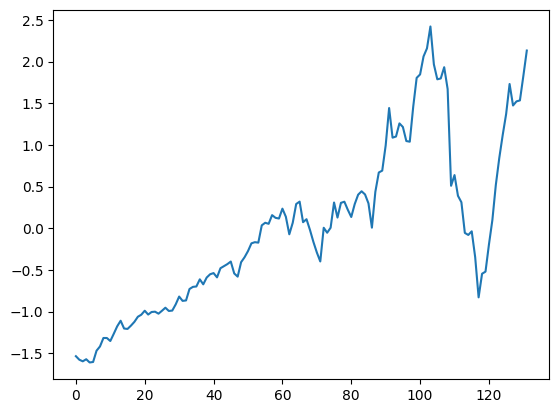

In [ ]:
plt.plot(hist2_est)

(array([6., 1., 1., 3., 2., 3., 3., 9., 2., 4., 1., 3., 4., 5., 4., 4., 2.,
        5., 1., 5., 8., 8., 2., 8., 2., 3., 2., 1., 2., 0., 1., 0., 3., 3.,
        0., 2., 1., 1., 4., 0., 1., 1., 5., 1., 1., 1., 2., 0., 0., 1.]),
 array([-1.61093157e+00, -1.53030136e+00, -1.44967114e+00, -1.36904092e+00,
        -1.28841070e+00, -1.20778049e+00, -1.12715027e+00, -1.04652005e+00,
        -9.65889835e-01, -8.85259618e-01, -8.04629400e-01, -7.23999183e-01,
        -6.43368966e-01, -5.62738749e-01, -4.82108532e-01, -4.01478314e-01,
        -3.20848097e-01, -2.40217880e-01, -1.59587663e-01, -7.89574454e-02,
         1.67277186e-03,  8.23029891e-02,  1.62933206e-01,  2.43563424e-01,
         3.24193641e-01,  4.04823858e-01,  4.85454075e-01,  5.66084292e-01,
         6.46714510e-01,  7.27344727e-01,  8.07974944e-01,  8.88605161e-01,
         9.69235379e-01,  1.04986560e+00,  1.13049581e+00,  1.21112603e+00,
         1.29175625e+00,  1.37238646e+00,  1.45301668e+00,  1.53364690e+00,
         1.614

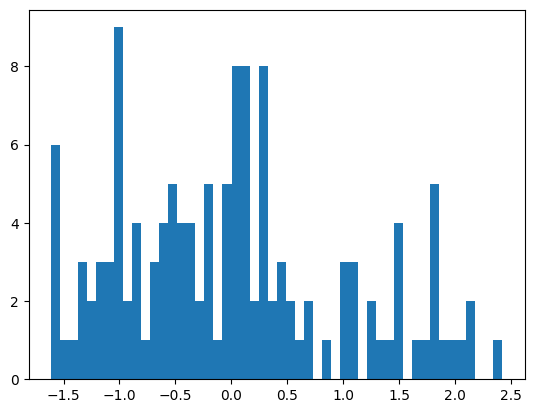

In [ ]:
plt.hist(hist2_est, bins=50)

## Datos atípicos OUTLIERS

#### Tres desviaciones estándar

In [ ]:
sum(np.abs((sp.stats.zscore(hist2)) > 2))

4

In [ ]:
hist2[(np.abs(sp.stats.zscore(hist2)) > 2)]

,Close
Date,
2021-06-01,346.666229
2021-07-01,355.230469
2021-08-01,378.241180
2023-12-01,352.897491


En este caso fueron solo 2, ya que con tres no nos arrojaba valores atípicos.Sirven para diferenciar observaciones for off de otras y "concentrar" la data en un set DF más limpio.

## Rangos intercuartílicos


In [ ]:
q1 = hist2.quantile(0.25)
q3 = hist2.quantile(0.75)
iqr = q3 - q1
iqr

112.55860328674316

In [ ]:
tabla=pd.DataFrame(index=["Precio (stock)"])
tabla['L_Inferior']=q1-1.5*iqr
tabla['L_superior']=q3+1.5*iqr
tabla

,L_Inferior,L_superior
Precio (stock),-75.321969,374.912444


In [ ]:
hist2[hist2 > q3+1.5*iqr]

,Close
Date,
2021-08-01,378.24118


{'whiskers': [<matplotlib.lines.Line2D at 0x7b026a0fc490>,
 'caps': [<matplotlib.lines.Line2D at 0x7b0269e7c7f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7b026a0fc730>],
 'medians': [<matplotlib.lines.Line2D at 0x7b0269e7c640>],
 'fliers': [<matplotlib.lines.Line2D at 0x7b0269e7c820>],
 'means': []}

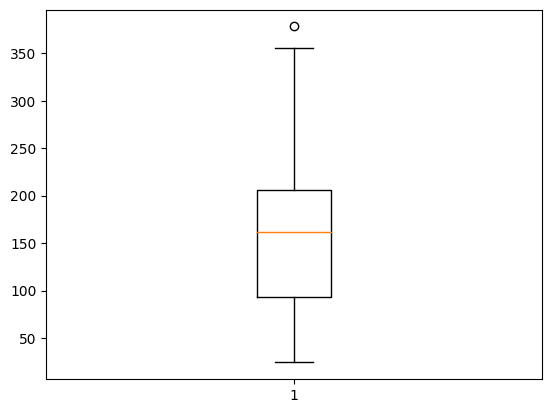

In [ ]:
plt.boxplot(hist2)

Detectar valores atípicos en un conjunto de datos. Se basa en crear un límite o "valla" a una distancia de 1,5 veces el rango intercuartil (RIC) más allá del primer y tercer cuartil. Los datos que se encuentran fuera de estas vallas se consideran valores atípicos.


## Transformaciones matemáticas
Logaritmo natural (log)

In [ ]:
np.log(hist2).skew()


-0.7996566509387742

In [ ]:
np.log(hist2).std()


0.6401289916958113

<Axes: xlabel='Date'>

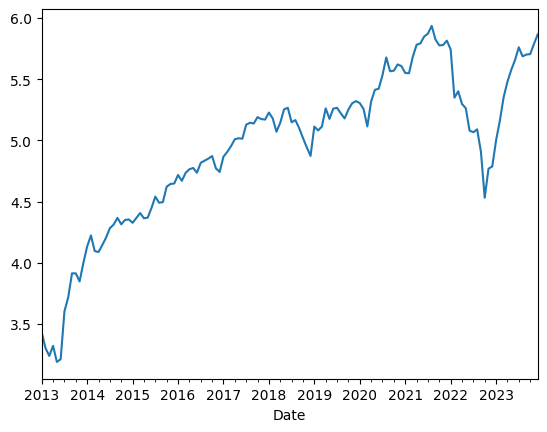

In [ ]:
np.log(hist2).plot()


<Axes: >

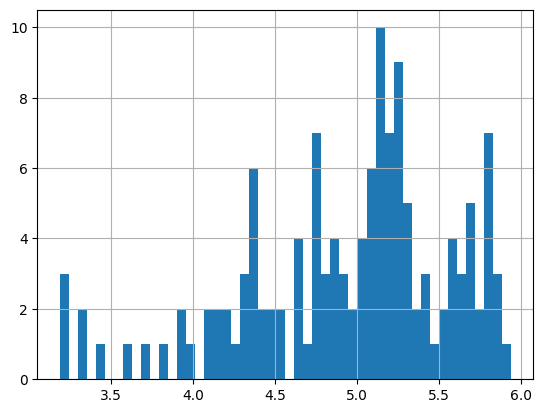

In [ ]:
np.log(hist2).hist(bins=50)


## BoxCox


In [ ]:
sp.stats.skew(sp.stats.boxcox(hist2)[0], bias=False)


-0.07455273162811858

In [ ]:
np.std(sp.stats.boxcox(hist2)[0])


7.387950023753896

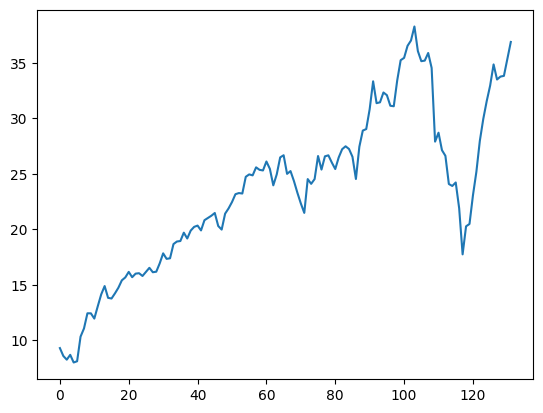

In [ ]:
plt.plot(sp.stats.boxcox(hist2)[0])



(array([4., 1., 1., 1., 0., 1., 1., 2., 1., 2., 2., 2., 4., 6., 2., 2., 2.,
        1., 3., 4., 5., 3., 5., 2., 1., 4., 6., 7., 8., 3., 8., 3., 4., 0.,
        3., 0., 1., 1., 5., 1., 1., 3., 3., 1., 4., 2., 2., 3., 0., 1.]),
 array([ 7.99098314,  8.5966876 ,  9.20239207,  9.80809654, 10.413801  ,
        11.01950547, 11.62520993, 12.2309144 , 12.83661887, 13.44232333,
        14.0480278 , 14.65373227, 15.25943673, 15.8651412 , 16.47084566,
        17.07655013, 17.6822546 , 18.28795906, 18.89366353, 19.49936799,
        20.10507246, 20.71077693, 21.31648139, 21.92218586, 22.52789032,
        23.13359479, 23.73929926, 24.34500372, 24.95070819, 25.55641266,
        26.16211712, 26.76782159, 27.37352605, 27.97923052, 28.58493499,
        29.19063945, 29.79634392, 30.40204838, 31.00775285, 31.61345732,
        32.21916178, 32.82486625, 33.43057072, 34.03627518, 34.64197965,
        35.24768411, 35.85338858, 36.45909305, 37.06479751, 37.67050198,
        38.27620644]),
 <BarContainer object

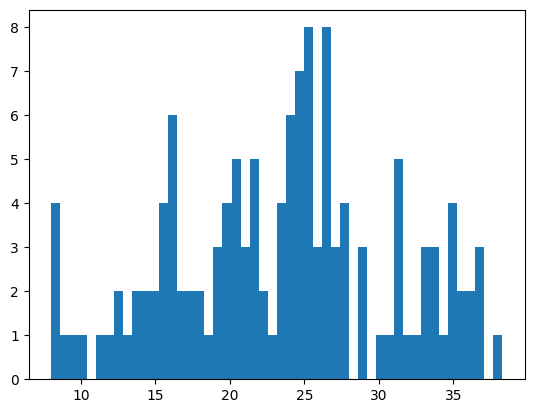

In [ ]:
plt.hist(sp.stats.boxcox(hist2)[0], bins=50)


In [ ]:
sp.stats.boxcox(hist2)[1] #lambda


0.5086038991379066